In [63]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [64]:
_df = pd.read_json('news_data.json', lines = True)
df = _df.drop(_df.columns[[0,4,5]], axis = 1)

In [65]:
df

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...
...,...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr..."
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked..."
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...


In [66]:
target_category = df['category'].unique()
print(target_category)

['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']


In [67]:
df['category'] = df['category'].astype('string')
df['headline'] = df['headline'].astype('string')
df['short_description'] = df['short_description'].astype('string')

In [68]:
df['category'].iloc[0:5]
df['category'].value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [69]:
df['headline'] = df['headline'].str.lower()
df['category'] = df['category'].str.lower()
df['short_description'] = df['short_description'].str.lower()

In [70]:
for index, row in df.iterrows():
    i = df['category'].at[index]
    
    if(i == "world news"):
        df['category'].at[index] = "worldpost" 
        
 
    if( i=="arts" or i == "arts & culture"):
        df['category'].at[index] = "culture & arts"
        
    if( i=="wellness"):
        df['category'].at[index] = "healthy living"
    
    if( i=="taste"):
        df['category'].at[index] = "food & drink"
   
    if( i=="parenting"):
        df['category'].at[index] = "parents"
   


    
# check that the species were converted correctly
df['category'].unique()

<StringArray>
[     'u.s. news',         'comedy',        'parents',      'worldpost',
 'culture & arts',           'tech',         'sports',  'entertainment',
       'politics',     'weird news',    'environment',      'education',
          'crime',        'science', 'healthy living',       'business',
 'style & beauty',   'food & drink',          'media',   'queer voices',
  'home & living',          'women',   'black voices',         'travel',
          'money',       'religion',  'latino voices',         'impact',
       'weddings',        'college',          'style',          'green',
  'the worldpost',      'good news',          'fifty',        'divorce']
Length: 36, dtype: string

In [71]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from nltk.tokenize import sent_tokenize
# print(stopwords.words('english'))

def remove_stopword(text):
    stop_word = set(stopwords.words('english'))
#     words = word_tokenize(text)
    return  " ".join([x for x in text.split() if x not in stop_word])


df['headline'] = df['headline'].apply(remove_stopword)
df['headline']


0         4 million americans roll sleeves omicron-targe...
1         american airlines flyer charged, banned life p...
2           23 funniest tweets cats dogs week (sept. 17-23)
3                funniest tweets parents week (sept. 17-23)
4         woman called cops black bird-watcher loses law...
                                ...                        
209522    rim ceo thorsten heins' 'significant' plans bl...
209523    maria sharapova stunned victoria azarenka aust...
209524    giants patriots, jets colts among improbable s...
209525    aldon smith arrested: 49ers linebacker busted dui
209526      dwight howard rips teammates magic loss hornets
Name: headline, Length: 209527, dtype: object

In [72]:
# df['categoryId'] = df['category'].factorize()[0]
# df.head()
df

,headline,category,short_description
0,4 million americans roll sleeves omicron-targe...,u.s. news,health experts said it is too early to predict...
1,"american airlines flyer charged, banned life p...",u.s. news,he was subdued by passengers and crew when he ...
2,23 funniest tweets cats dogs week (sept. 17-23),comedy,"""until you have a dog you don't understand wha..."
3,funniest tweets parents week (sept. 17-23),parents,"""accidentally put grown-up toothpaste on my to..."
4,woman called cops black bird-watcher loses law...,u.s. news,amy cooper accused investment firm franklin te...
...,...,...,...
209522,rim ceo thorsten heins' 'significant' plans bl...,tech,verizon wireless and at&t are already promotin...
209523,maria sharapova stunned victoria azarenka aust...,sports,"afterward, azarenka, more effusive with the pr..."
209524,"giants patriots, jets colts among improbable s...",sports,"leading up to super bowl xlvi, the most talked..."
209525,aldon smith arrested: 49ers linebacker busted dui,sports,correction: an earlier version of this story i...


In [73]:
def special_char(text):
    reviews = ''
    for x in text:
        if(x.isalnum()):
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews
df['headline'] = df['headline'].apply(special_char)

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(stop_words='english')

vec = CountVectorizer(lowercase=False)
vec.fit_transform(df['headline'])

<209527x56733 sparse matrix of type '<class 'numpy.int64'>'
	with 1422823 stored elements in Compressed Sparse Row format>

In [75]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
label = le.fit(df["category"])
print(label.classes_)         #prints labels by order as fitted in encoder


labelEncode = le.fit_transform(df["category"])

print("LabelEncode")
print(labelEncode)

categorical_y = labelEncode


# categorical_y = to_categorical(labelEncode)
# print("\n To_Categorical one hot encode")
# print(categorical_y)


['black voices' 'business' 'college' 'comedy' 'crime' 'culture & arts'
 'divorce' 'education' 'entertainment' 'environment' 'fifty'
 'food & drink' 'good news' 'green' 'healthy living' 'home & living'
 'impact' 'latino voices' 'media' 'money' 'parents' 'politics'
 'queer voices' 'religion' 'science' 'sports' 'style' 'style & beauty'
 'tech' 'the worldpost' 'travel' 'u.s. news' 'weddings' 'weird news'
 'women' 'worldpost']
LabelEncode
[31 31  3 ... 25 25 25]


In [76]:
from sklearn.model_selection import train_test_split

x = vec.fit_transform(df['headline'])
y=  df['category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# run_model("Logistic Regression", est_c=None, est_pnlty=None)
mdl = LogisticRegression(solver='saga', multi_class = "multinomial",max_iter = 100)
mdl.fit(x_train,y_train)



C:\Users\ALI\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='saga')

In [78]:
y_pred_test = mdl.predict(x_test)
y_pred_train = mdl.predict(x_train)

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


score_f1_test = f1_score(y_test, y_pred_test,average = 'weighted')
score_f1_train = f1_score(y_train, y_pred_train,average = 'weighted')

score_f1_test_micro = f1_score(y_test, y_pred_test,average = 'micro')
score_f1_train_micro = f1_score(y_train, y_pred_train,average = 'micro')


print("Training Evaluation")
print("Weighted F1-Score: ", score_f1_train)
print("Micro F1-Score: ", score_f1_train_micro)


print('-' * 20)

print("Weighted F1-Score: ", score_f1_test)
print("Micro F1-Score: ", score_f1_test_micro)


Training Evaluation
Weighted F1-Score:  0.8041913295559597
Micro F1-Score:  0.8073912628464157
--------------------
Weighted F1-Score:  0.6168667034933708
Micro F1-Score:  0.6303631938147282


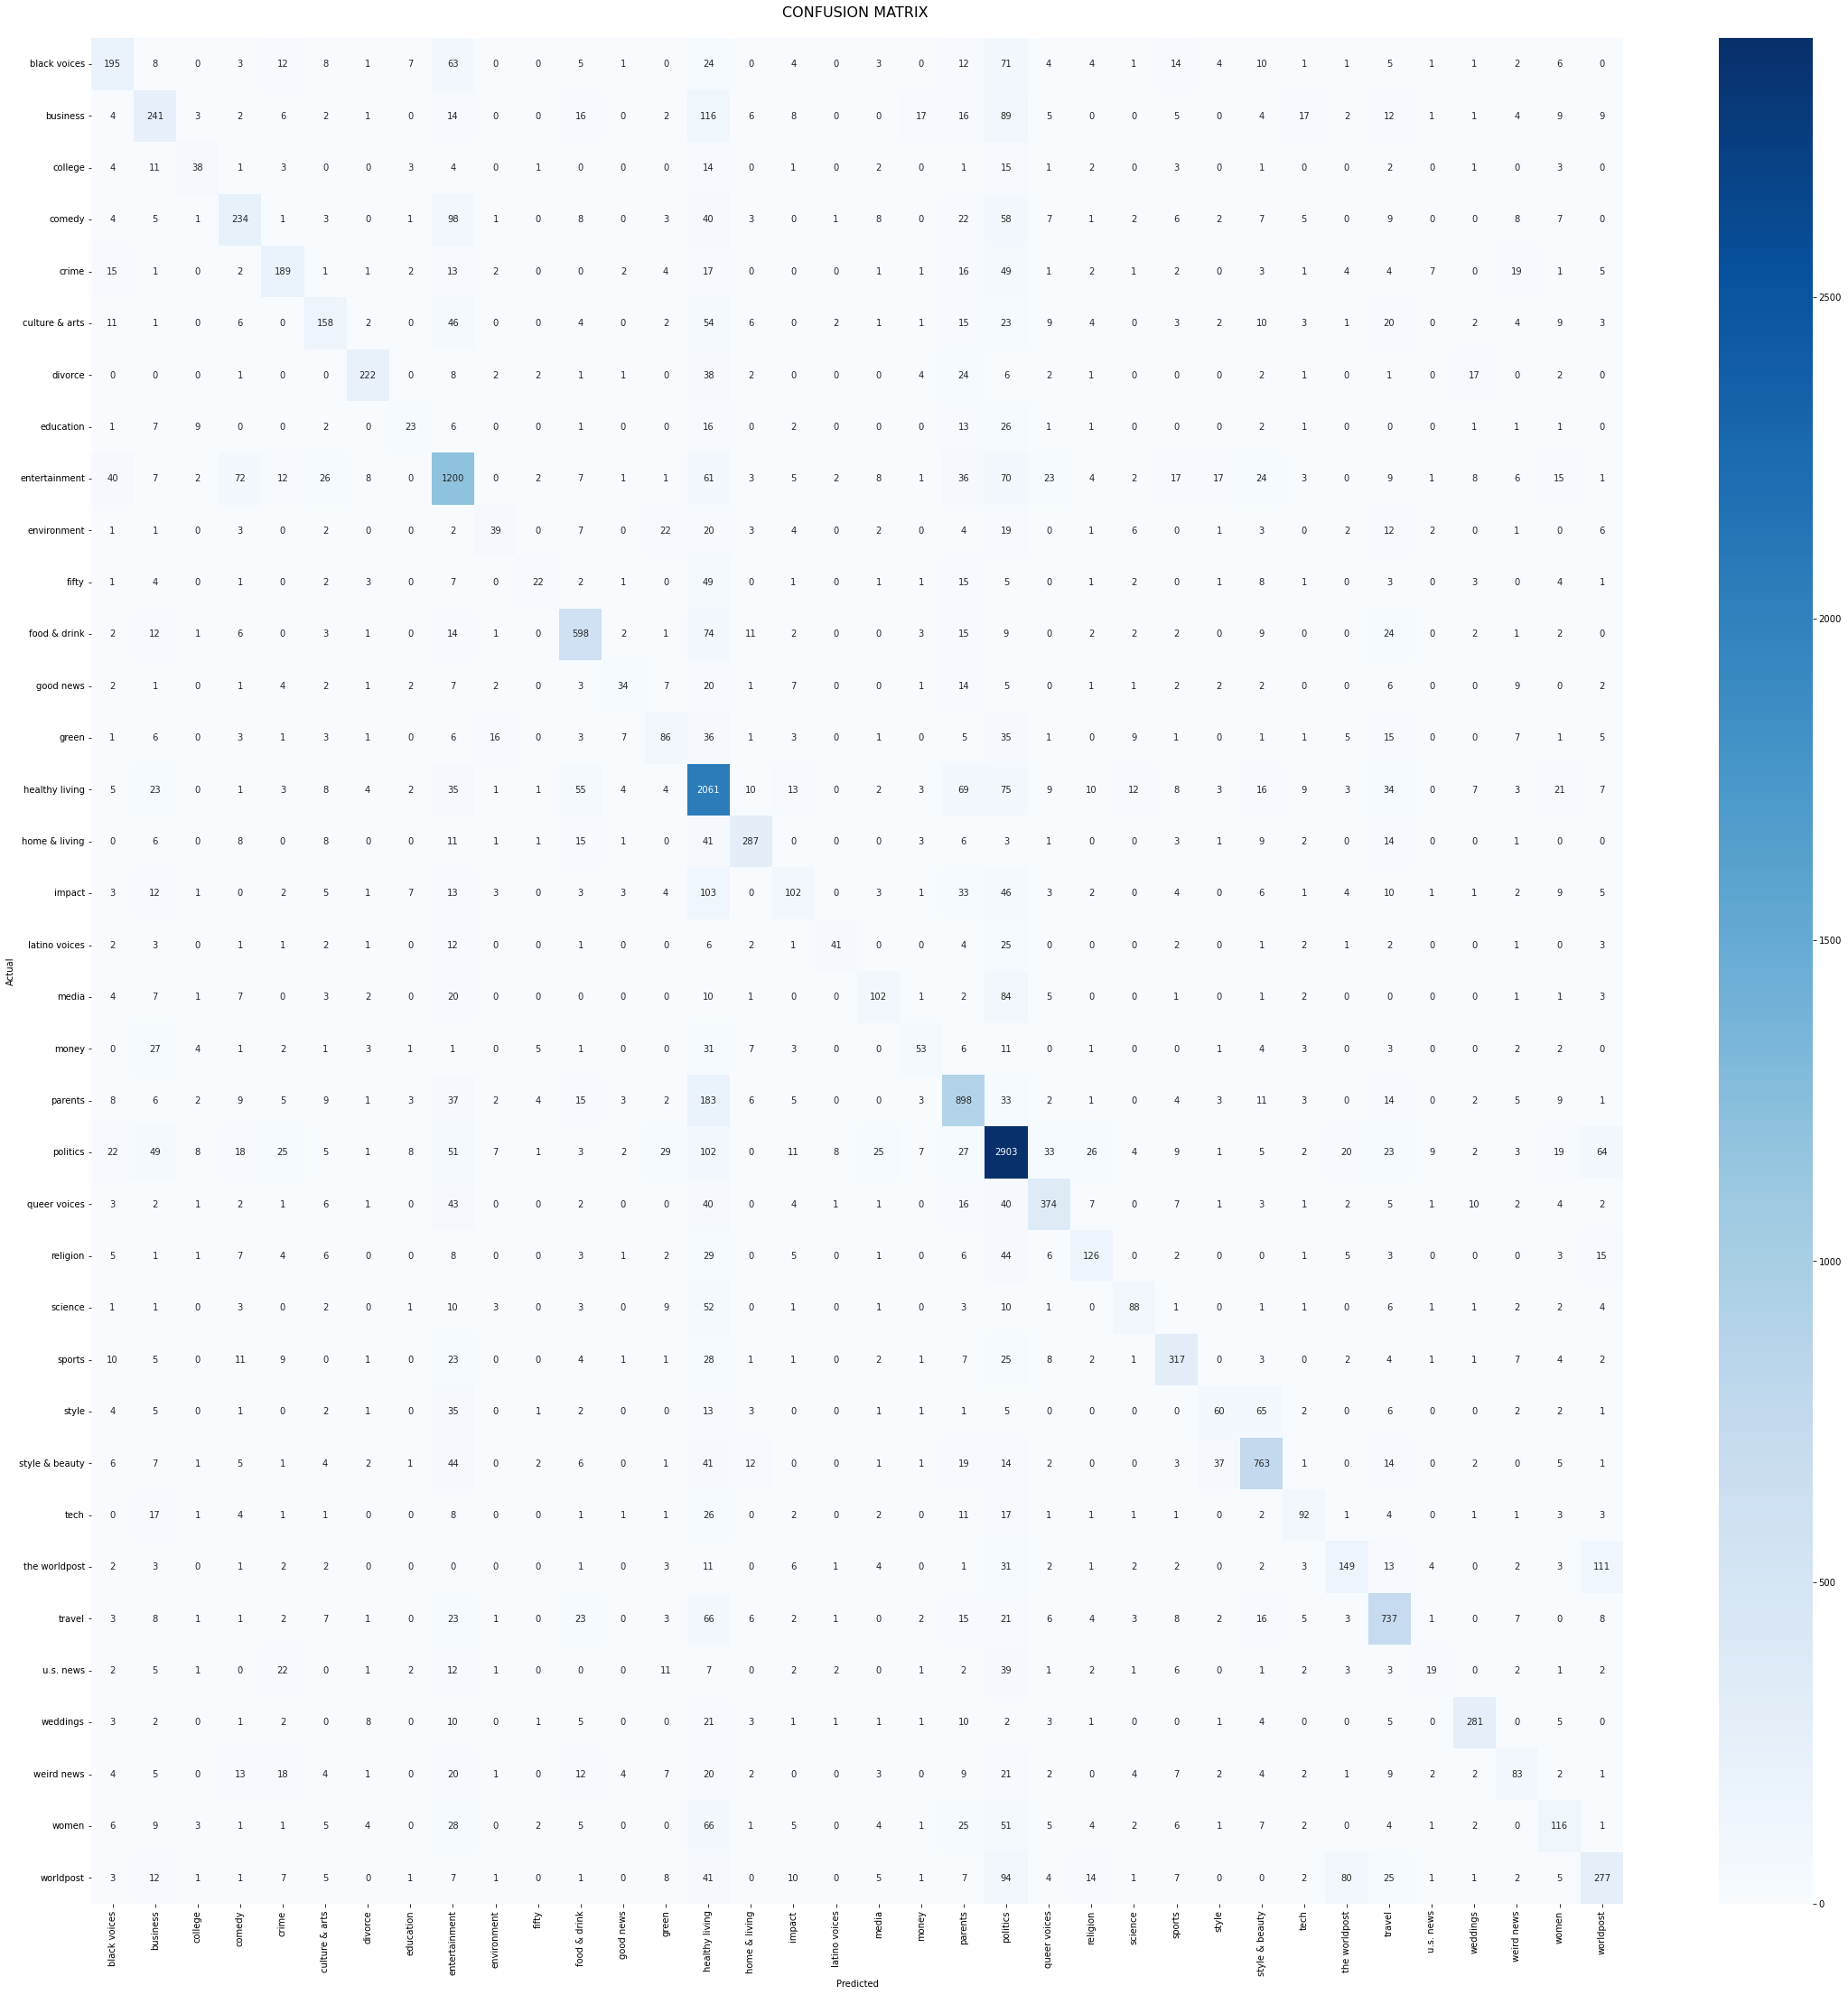

In [80]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix



conf_mat = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(38,38))

sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=label.classes_, 
            yticklabels=label.classes_)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX \n", size=16);

In [81]:
from sklearn.model_selection import cross_val_score

k_F = cross_val_score(mdl,  x, y,scoring = 'f1_weighted', cv=10)

C:\Users\ALI\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ALI\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ALI\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ALI\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ALI\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ALI\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached 

In [85]:
k_F.mean()

0.5878340584527839

## Navie Bayes

In [86]:
from sklearn.naive_bayes import MultinomialNB

mdl2 = MultinomialNB(alpha=.15,fit_prior=False)
mdl2.fit(x_train,y_train)

MultinomialNB(alpha=0.15, fit_prior=False)

In [87]:
y_pred_test = mdl2.predict(x_test)
y_pred_train = mdl2.predict(x_train)

In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


score_f1_test = f1_score(y_test, y_pred_test,average = 'weighted')
score_f1_train = f1_score(y_train, y_pred_train,average = 'weighted')

score_f1_test_micro = f1_score(y_test, y_pred_test,average = 'micro')
score_f1_train_micro = f1_score(y_train, y_pred_train,average = 'micro')


print("Training Evaluation")
print("Weighted F1-Score: ", score_f1_train)
print("Micro F1-Score: ", score_f1_train_micro)


print('-' * 20)

print("Weighted F1-Score: ", score_f1_test)
print("Micro F1-Score: ", score_f1_test_micro)


Training Evaluation
Weighted F1-Score:  0.756615224341687
Micro F1-Score:  0.7543828947787076
--------------------
Weighted F1-Score:  0.5839084700337281
Micro F1-Score:  0.5753352741850809


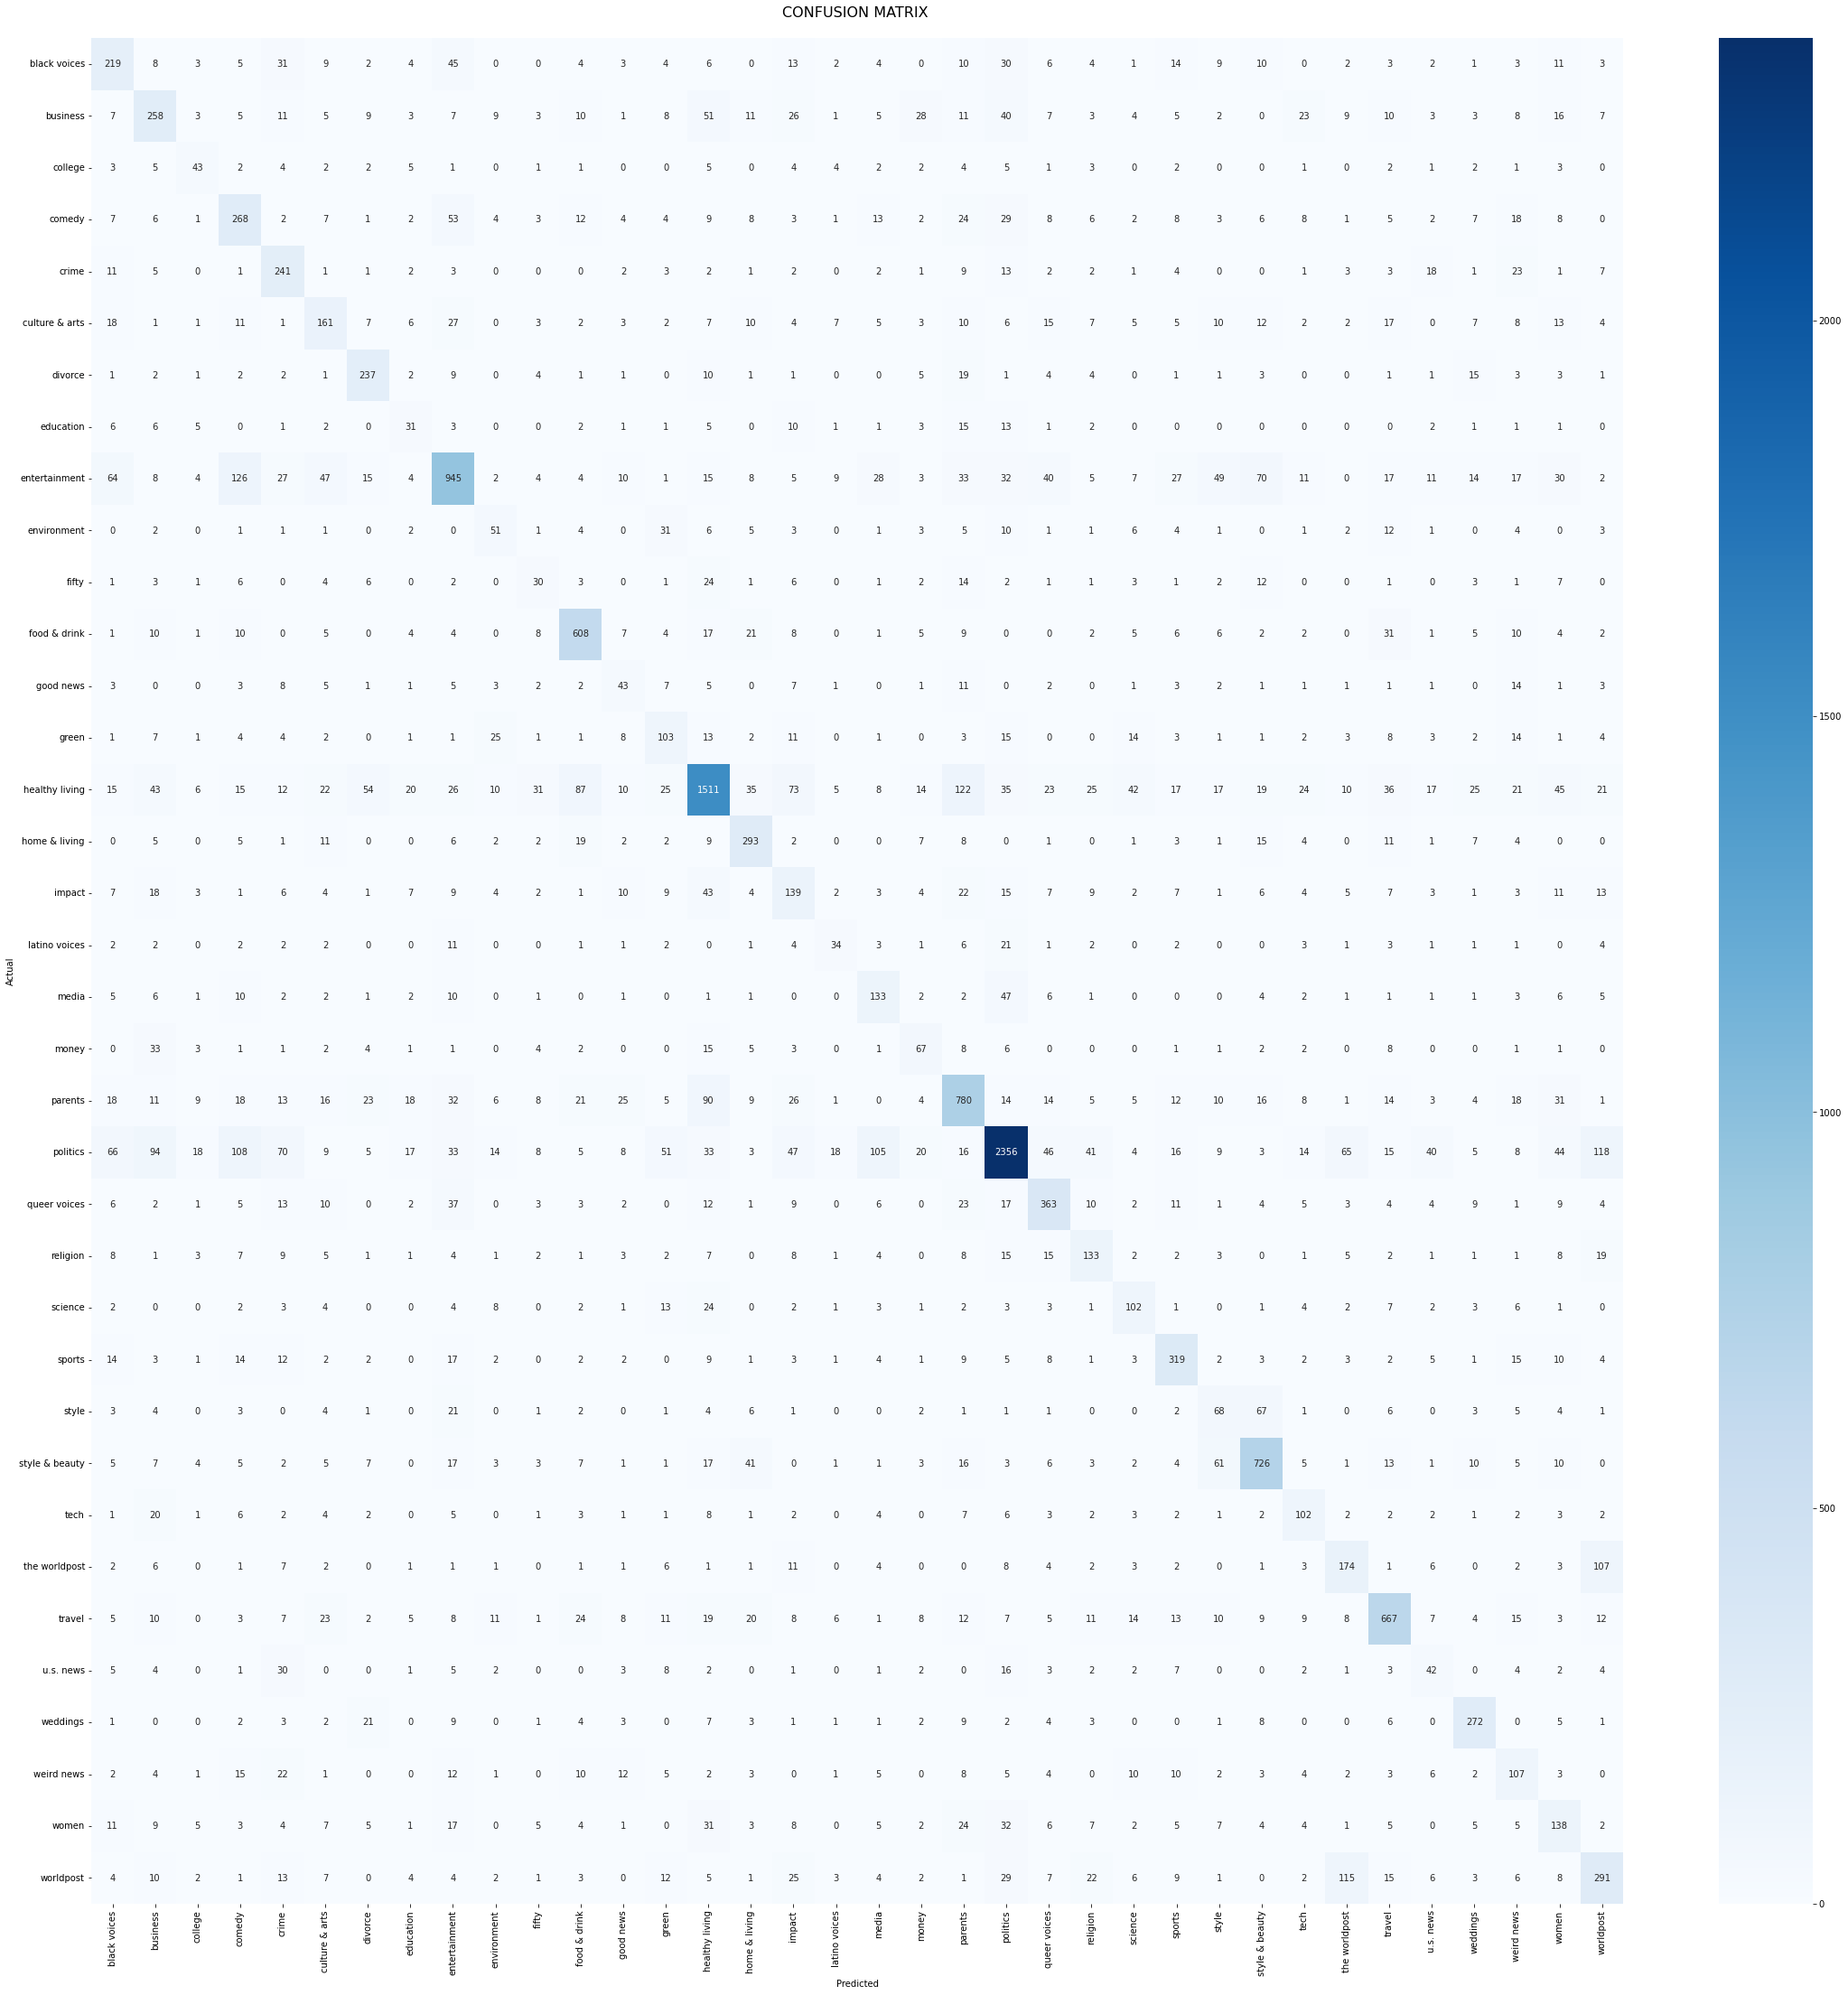

In [89]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix



conf_mat = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(38,38))

sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=label.classes_, 
            yticklabels=label.classes_)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX \n", size=16);

In [90]:
scores2 = cross_val_score(mdl2, x, y, scoring = 'f1_weighted', cv=10)
scores2.mean()

0.5567728279146221